# Классификационное дерево и Random Forest

**Дерево решений (Decision Tree)** — это алгоритм машинного обучения, который строит древовидную структуру,
разделяя данные по признакам на основе критериев (Gini, энтропия) для решения задач классификации и регрессии.
Модель легко интерпретируема, но склонна к переобучению.

**Random Forest (Случайный лес)** — ансамблевый метод, объединяющий множество деревьев решений, каждое из которых
обучается на случайной подвыборке данных и признаков (бэггинг). Итоговое предсказание формируется голосованием.
Случайный лес значительно снижает дисперсию модели, повышает устойчивость к шуму и переобучению, сохраняя при этом
высокую точность.

## Импорт библиотек

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Настройки отображения
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

# Поддержка кириллицы в графиках
plt.rcParams['font.family'] = 'DejaVu Sans'

print("Все библиотеки успешно импортированы!")

Все библиотеки успешно импортированы!


## Загрузка и описание датасета

https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment

### Краткое описание
Данные собраны в ходе экспериментов по быстрым свиданиям (speed dating), проведённых профессорами Колумбийского университета в 2002–2004 гг. Каждая строка — одна встреча двух участников. Записаны демографические данные, самооценки, оценки партнёра по нескольким критериям, интересы и хобби. Задача — предсказать, будет ли взаимный интерес (match).

### Параметры (признаки) — основные из ~195 колонок

| Признак | Описание |
|---------|----------|
| `iid` | Уникальный ID участника |
| `gender` | Пол: 0 — женщина, 1 — мужчина |
| `age` | Возраст участника |
| `age_o` | Возраст партнёра |
| `race` | Раса/этническая принадлежность (кодирована числами) |
| `race_o` | Раса партнёра |
| `importance_same_race` | Насколько важна одинаковая раса (1–10) |
| `importance_same_religion` | Насколько важна одинаковая религия (1–10) |
| `field_cd` | Область учёбы/работы (категориальный, кодирован числами) |
| `pref_o_attractive` | Что партнёр ценит: привлекательность (% из 100) |
| `pref_o_sincere` | Что партнёр ценит: искренность (% из 100) |
| `pref_o_intelligence` | Что партнёр ценит: ум (% из 100) |
| `pref_o_funny` | Что партнёр ценит: чувство юмора (% из 100) |
| `pref_o_ambitious` | Что партнёр ценит: амбициозность (% из 100) |
| `pref_o_shared_interests` | Что партнёр ценит: общие интересы (% из 100) |
| `attractive_o` | Оценка привлекательности, данная партнёром (1–10) |
| `sincere_o` | Оценка искренности, данная партнёром (1–10) |
| `intelligence_o` | Оценка ума, данная партнёром (1–10) |
| `funny_o` | Оценка юмора, данная партнёром (1–10) |
| `ambitous_o` | Оценка амбициозности, данная партнёром (1–10) |
| `shared_interests_o` | Оценка общих интересов, данная партнёром (1–10) |
| `attractive` | Самооценка привлекательности (1–10) |
| `sincere` | Самооценка искренности (1–10) |
| `intelligence` | Самооценка ума (1–10) |
| `funny` | Самооценка юмора (1–10) |
| `ambition` | Самооценка амбициозности (1–10) |
| `interests_correlate` | Корреляция интересов между участниками (вещественное число) |
| `expected_happy_with_sd_people` | Ожидание удовольствия от знакомств (1–10) |
| `like` | Общая оценка партнёра (1–10) |
| `prob` | Оценка вероятности, что партнёр захочет встретиться снова (1–10) |
| `met` | Встречались ли ранее: 1 — да, 2 — нет |
| `sports`, `tvsports`, `exercise`, `dining`, `museums`, `art`, `hiking`, `gaming`, `clubbing`, `reading`, `tv`, `theater`, `movies`, `concerts`, `music`, `shopping`, `yoga` | Интересы и хобби — самооценка важности каждого (1–10) |
| `dec` | Решение участника: 1 — хочет встретиться снова, 0 — нет |

### Целевая переменная

| Переменная | Описание |
|------------|----------|
| `match` | **1** — оба участника выразили желание встретиться снова (взаимный интерес), **0** — нет |


In [26]:
# Загрузка данных: https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment
df = pd.read_csv('Speed Dating Data.csv', encoding='latin-1')

print("=" * 70)
print("ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 70)
print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nПервые 5 строк датасета:")
df.head()

ОБЩАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ

Размер датасета: 8378 строк, 195 столбцов

Первые 5 строк датасета:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,...,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [27]:
# Информация о типах данных и пропусках
print("=" * 70)
print("ТИПЫ ДАННЫХ И ПРОПУСКИ")
print("=" * 70)
print(f"\nОбщее количество пропусков: {df.isnull().sum().sum()}")
print(f"\nПроцент пропусков по столбцам (топ-20):")
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print(missing_pct[missing_pct > 0].head(20).round(2))

ТИПЫ ДАННЫХ И ПРОПУСКИ

Общее количество пропусков: 432016

Процент пропусков по столбцам (топ-20):
num_in_3    92.03
numdat_3    82.14
expnum      78.52
sinc7_2     76.67
amb7_2      76.67
shar7_2     76.44
attr7_2     76.32
fun7_2      76.32
intel7_2    76.32
fun5_3      75.94
amb5_3      75.94
shar2_3     75.94
attr5_3     75.94
amb7_3      75.94
shar7_3     75.94
sinc5_3     75.94
sinc7_3     75.94
intel7_3    75.94
fun7_3      75.94
attr7_3     75.94
dtype: float64


РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (match)

match
0    6998
1    1380
Name: count, dtype: int64

Доля положительного класса (match=1): 16.47%


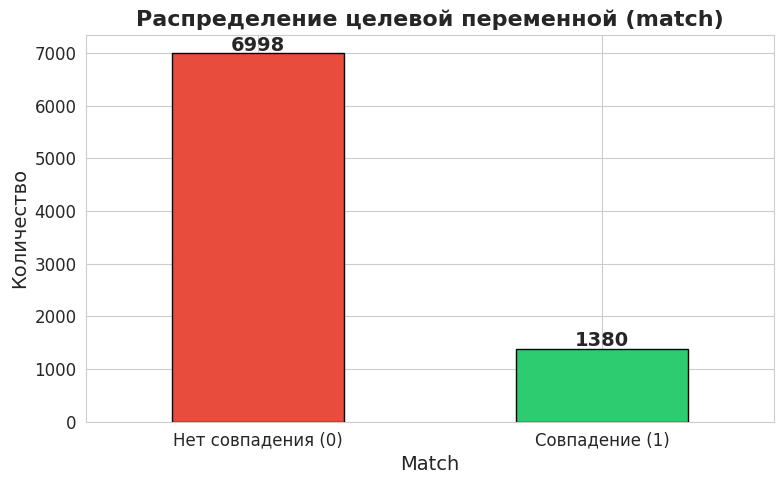

In [28]:
# Распределение целевой переменной
print("=" * 70)
print("РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (match)")
print("=" * 70)
print(f"\n{df['match'].value_counts()}")
print(f"\nДоля положительного класса (match=1): {df['match'].mean()*100:.2f}%")

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
colors = ['#e74c3c', '#2ecc71']
df['match'].value_counts().plot(kind='bar', color=colors, edgecolor='black', ax=ax)
ax.set_title('Распределение целевой переменной (match)', fontsize=16, fontweight='bold')
ax.set_xlabel('Match', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)
ax.set_xticklabels(['Нет совпадения (0)', 'Совпадение (1)'], rotation=0, fontsize=12)
for i, v in enumerate(df['match'].value_counts().values):
    ax.text(i, v + 50, str(v), ha='center', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [29]:
# Статистическое описание числовых столбцов
print("=" * 70)
print("СТАТИСТИЧЕСКОЕ ОПИСАНИЕ КЛЮЧЕВЫХ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("=" * 70)
key_cols = ['age', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar',
            'like', 'prob', 'match']
print(df[key_cols].describe().round(2))

СТАТИСТИЧЕСКОЕ ОПИСАНИЕ КЛЮЧЕВЫХ ЧИСЛОВЫХ ПРИЗНАКОВ
           age     attr     sinc    intel      fun      amb     shar     like     prob    match
count  8283.00  8176.00  8101.00  8082.00  8028.00  7666.00  7311.00  8138.00  8069.00  8378.00
mean     26.36     6.19     7.18     7.37     6.40     6.78     5.47     6.13     5.21     0.16
std       3.57     1.95     1.74     1.55     1.95     1.79     2.16     1.84     2.13     0.37
min      18.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00
25%      24.00     5.00     6.00     6.00     5.00     6.00     4.00     5.00     4.00     0.00
50%      26.00     6.00     7.00     7.00     7.00     7.00     6.00     6.00     5.00     0.00
75%      28.00     8.00     8.00     8.00     8.00     8.00     7.00     7.00     7.00     0.00
max      55.00    10.00    10.00    10.00    10.00    10.00    10.00    10.00    10.00     1.00


## Предварительная обработка данных

In [30]:
print("=" * 70)
print("ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ")
print("=" * 70)

# Выбор релевантных признаков для модели
# Оценки, которые участник ставит партнёру
partner_ratings = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

# Что участник считает важным в партнёре (из 100 баллов)
importance_features = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Самооценка участника
self_ratings = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1']

# Демографические признаки
demo_features = ['age', 'gender', 'race', 'imprace', 'imprelig']

# Дополнительные признаки
other_features = ['int_corr', 'samerace', 'age_o', 'go_out', 'sports', 'museums']

# Собираем все признаки
all_features = partner_ratings + importance_features + self_ratings + demo_features + other_features
target = 'match'

# Проверяем наличие столбцов в датасете
available_features = [col for col in all_features if col in df.columns]
missing_features = [col for col in all_features if col not in df.columns]

print(f"\nДоступных признаков: {len(available_features)}")
if missing_features:
    print(f"Отсутствующих признаков: {missing_features}")

# Создаём рабочий датасет
df_work = df[available_features + [target]].copy()
print(f"\nРазмер рабочего датасета до очистки: {df_work.shape}")

# Информация о пропусках в рабочем датасете
print(f"\nПропуски в рабочем датасете:")
missing_info = df_work.isnull().sum()
print(missing_info[missing_info > 0].sort_values(ascending=False))

ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ

Доступных признаков: 29

Размер рабочего датасета до очистки: (8378, 30)

Пропуски в рабочем датасете:
shar        1067
amb          712
fun          350
prob         309
intel        296
sinc         277
like         240
attr         202
int_corr     158
shar1_1      121
intel3_1     105
fun3_1       105
sinc3_1      105
attr3_1      105
age_o        104
amb1_1        99
age           95
fun1_1        89
attr1_1       79
intel1_1      79
sinc1_1       79
imprelig      79
imprace       79
sports        79
go_out        79
museums       79
race          63
dtype: int64


In [31]:
# Стратегия обработки пропусков:
# 1. Для оценок партнёра (attr, sinc и т.д.) — заполняем медианой по группам (gender)
# 2. Для остальных — заполняем медианой
# 3. Если слишком много пропусков — удаляем строки

print("\nОбработка пропусков...")

# Заполняем числовые признаки медианой
for col in available_features:
    if df_work[col].isnull().sum() > 0:
        median_val = df_work[col].median()
        df_work[col].fillna(median_val, inplace=True)

# Удаляем оставшиеся строки с пропусками в целевой переменной
df_work.dropna(subset=[target], inplace=True)

print(f"Размер датасета после обработки пропусков: {df_work.shape}")
print(f"Оставшихся пропусков: {df_work.isnull().sum().sum()}")


Обработка пропусков...
Размер датасета после обработки пропусков: (8378, 30)
Оставшихся пропусков: 0


In [32]:
# Инженерия признаков
print("\nСоздание дополнительных признаков...")

# Разница в возрасте
if 'age' in df_work.columns and 'age_o' in df_work.columns:
    df_work['age_diff'] = abs(df_work['age'] - df_work['age_o'])
    available_features.append('age_diff')

# Средняя оценка партнёра
rating_cols = [c for c in partner_ratings if c in df_work.columns and c not in ['like', 'prob']]
if rating_cols:
    df_work['avg_partner_rating'] = df_work[rating_cols].mean(axis=1)
    available_features.append('avg_partner_rating')

print(f"Итоговое количество признаков: {len(available_features)}")
print(f"Итоговый размер датасета: {df_work.shape}")


Создание дополнительных признаков...
Итоговое количество признаков: 31
Итоговый размер датасета: (8378, 32)


In [33]:
# Разделение на обучающую и тестовую выборки
X = df_work[available_features]
y = df_work[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True).round(4) * 100)

print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True).round(4) * 100)


Размер обучающей выборки: (6283, 31)
Размер тестовой выборки: (2095, 31)

Распределение классов в обучающей выборке:
match
0    83.53
1    16.47
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
match
0    83.53
1    16.47
Name: proportion, dtype: float64


In [34]:
# Масштабирование
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=available_features,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=available_features,
    index=X_test.index
)

print("Масштабирование завершено!")
print(f"\nПример масштабированных данных (первые 5 строк):")
X_train_scaled.head()

Масштабирование завершено!

Пример масштабированных данных (первые 5 строк):


,attr,sinc,intel,fun,amb,shar,like,prob,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,intel3_1,fun3_1,age,gender,race,imprace,imprelig,int_corr,samerace,age_o,go_out,sports,museums,age_diff,avg_partner_rating
8028,-0.618163,-0.106595,0.410362,-1.264059,-0.469724,0.225147,-0.618635,-1.989387,-0.201971,-1.772859,0.693287,1.219577,-0.931018,1.301705,-0.053453,0.508876,0.561932,0.818196,-1.222001,0.996663,1.021098,1.131707,-0.953721,0.548458,1.247038,-0.93525,-1.047545,-0.143234,0.501029,-0.866701,-0.436102
301,-1.655618,-0.692798,-0.894944,-1.264059,-1.047727,-2.249227,-2.808059,-1.515892,-0.441345,-1.054451,-0.334047,0.402455,2.340289,-0.276880,-0.766494,-1.675051,-1.313564,-0.472309,-1.222001,-1.003348,0.206527,-0.987250,0.476918,-1.539541,-0.801900,0.47350,-0.150608,0.236167,0.009236,0.778559,-1.796354
4494,-0.618163,1.652014,0.410362,0.300267,0.686280,1.214897,-0.071279,1.325077,0.196986,1.100774,-0.774332,-0.414666,-0.113192,-0.276880,0.659589,1.236852,-0.375816,0.818196,-1.505096,-1.003348,-0.608044,1.838026,1.549897,0.614744,-0.801900,0.19175,-1.047545,-0.522635,1.484616,0.778559,0.800490
710,-0.618163,-0.106595,-0.242291,0.300267,0.108278,0.225147,0.476077,0.851582,0.994900,-1.054451,-0.040523,-0.414666,-0.113192,-0.276880,0.659589,0.508876,1.499680,0.818196,0.193476,0.996663,-1.422615,0.072228,0.119258,-0.578399,-0.801900,0.19175,-0.150608,1.374371,-0.974350,-1.195753,-0.065124
2003,0.938019,0.479608,0.410362,-0.742617,-1.047727,-1.754352,-0.071279,-1.042397,-0.593746,-0.051553,-0.483744,0.217786,1.337633,0.229846,0.659589,0.508876,0.561932,0.818196,0.193476,-1.003348,1.021098,1.131707,0.119258,-0.379542,-0.801900,0.47350,-1.047545,0.236167,0.992823,-0.866701,-0.436102


## Тепловая карта корреляций

ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ


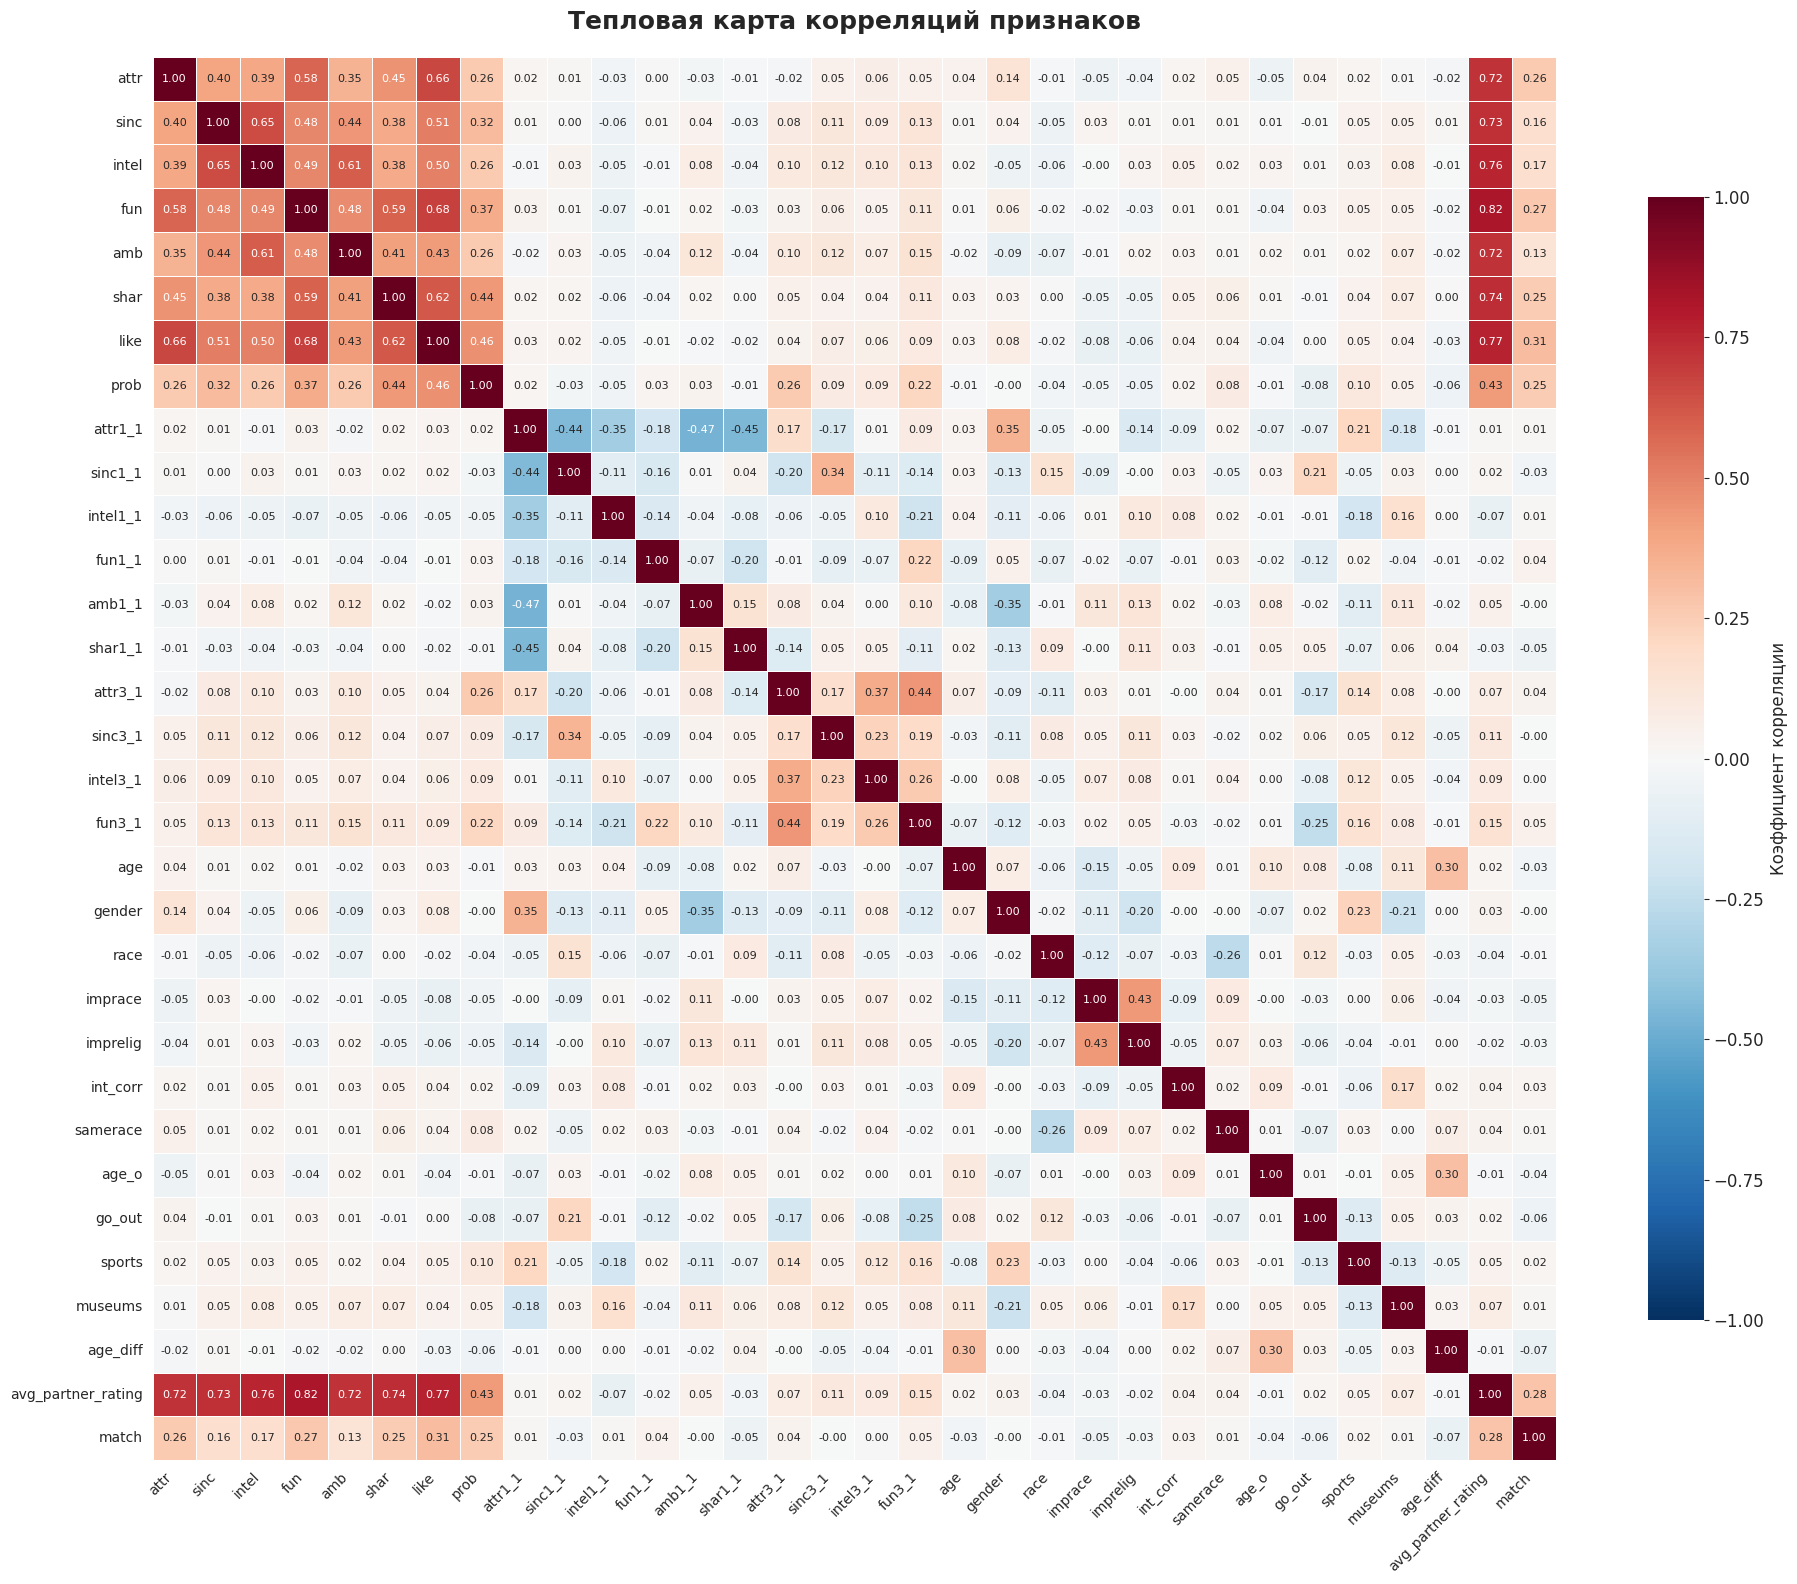

In [35]:
print("=" * 70)
print("ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ")
print("=" * 70)

# Корреляционная матрица всех признаков + целевая переменная
corr_data = df_work[available_features + [target]]
corr_matrix = corr_data.corr()

fig, ax = plt.subplots(figsize=(20, 16))

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Коэффициент корреляции"},
    annot_kws={"size": 8},
    ax=ax
)
ax.set_title('Тепловая карта корреляций признаков', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Корреляция признаков с целевой переменной (match):
like                  0.3053
avg_partner_rating    0.2848
fun                   0.2703
attr                  0.2607
prob                  0.2547
shar                  0.2518
intel                 0.1713
sinc                  0.1646
amb                   0.1339
fun3_1                0.0513
fun1_1                0.0415
attr3_1               0.0359
int_corr              0.0308
sports                0.0217
museums               0.0149
attr1_1               0.0147
intel1_1              0.0140
samerace              0.0130
intel3_1              0.0029
gender               -0.0005
sinc3_1              -0.0027
amb1_1               -0.0045
race                 -0.0139
imprelig             -0.0260
sinc1_1              -0.0321
age                  -0.0349
age_o                -0.0357
shar1_1              -0.0480
imprace              -0.0489
go_out               -0.0603
age_diff             -0.0672
Name: match, dtype: float64


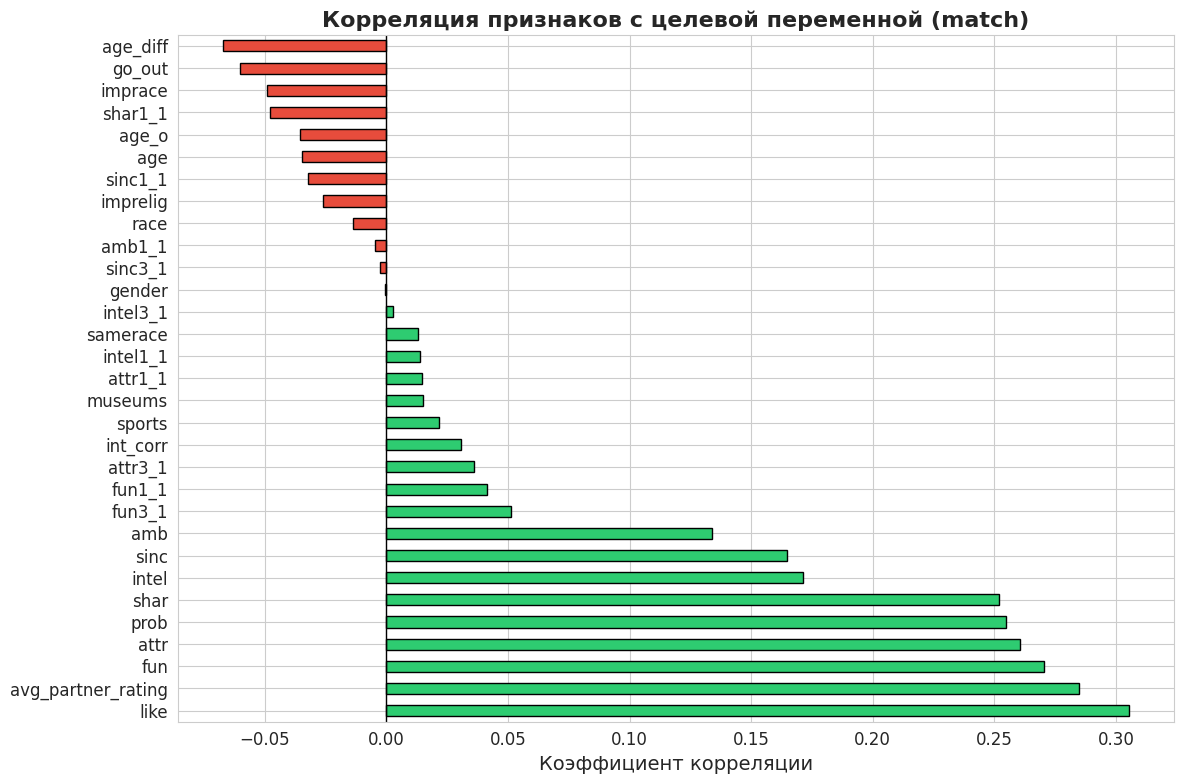

In [36]:
# Корреляции с целевой переменной
print("\nКорреляция признаков с целевой переменной (match):")
print("=" * 50)
target_corr = corr_matrix[target].drop(target).sort_values(ascending=False)
print(target_corr.round(4))

fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#2ecc71' if v > 0 else '#e74c3c' for v in target_corr.values]
target_corr.plot(kind='barh', color=colors, edgecolor='black', ax=ax)
ax.set_title('Корреляция признаков с целевой переменной (match)', fontsize=16, fontweight='bold')
ax.set_xlabel('Коэффициент корреляции', fontsize=14)
ax.axvline(x=0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

## Обучение моделей

In [41]:
print("\n" + "-" * 40)
print("ДЕРЕВО РЕШЕНИЙ (Decision Tree)")
print("-" * 40)

# Подбор гиперпараметров с помощью GridSearchCV
# dt_param_grid = {
#     'max_depth': [3, 5, 7, 10, 15, None],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'criterion': ['gini', 'entropy']
# }
dt_param_grid = {
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [5],
    'criterion': ['gini']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

print("Запуск GridSearchCV для дерева решений...")
dt_grid.fit(X_train, y_train)

print(f"\nЛучшие параметры: {dt_grid.best_params_}")
print(f"Лучший F1-score (CV): {dt_grid.best_score_:.4f}")

dt_model = dt_grid.best_estimator_
print(f"\nГлубина дерева: {dt_model.get_depth()}")
print(f"Количество листьев: {dt_model.get_n_leaves()}")


----------------------------------------
ДЕРЕВО РЕШЕНИЙ (Decision Tree)
----------------------------------------
Запуск GridSearchCV для дерева решений...

Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Лучший F1-score (CV): 0.3480

Глубина дерева: 21
Количество листьев: 461


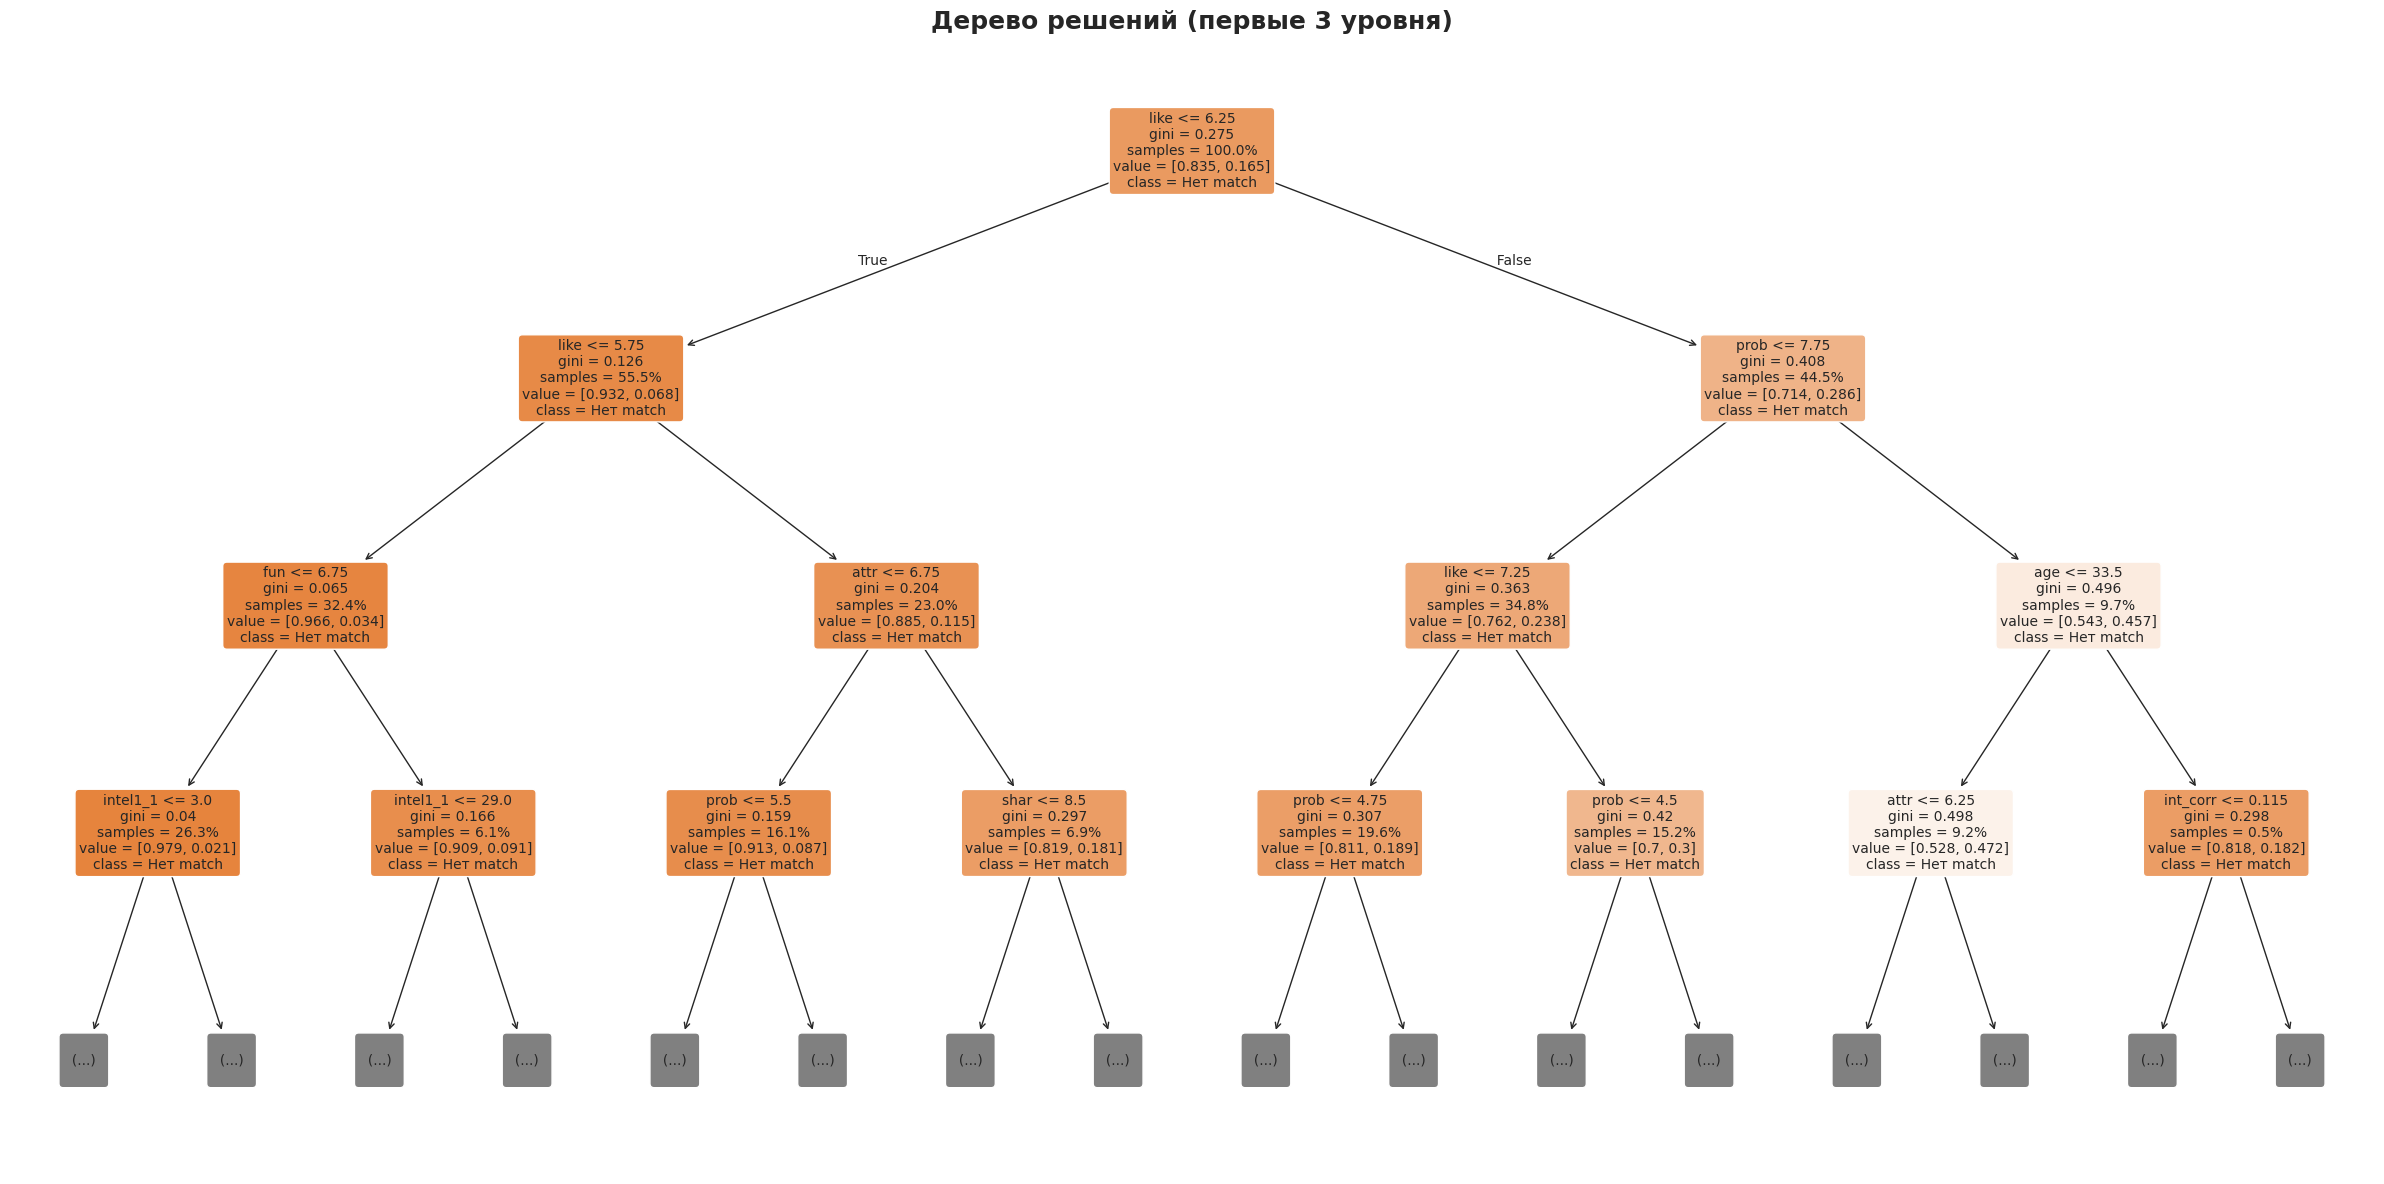

In [59]:
# Визуализация дерева решений
fig, ax = plt.subplots(figsize=(24, 12))
plot_tree(
    dt_model,
    max_depth=3,  # Показываем только первые 3 уровня для читаемости
    feature_names=available_features,
    class_names=['Нет match', 'Match'],
    filled=True,
    rounded=True,
    fontsize=10,
    ax=ax,
    proportion=True
)
ax.set_title('Дерево решений (первые 3 уровня)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

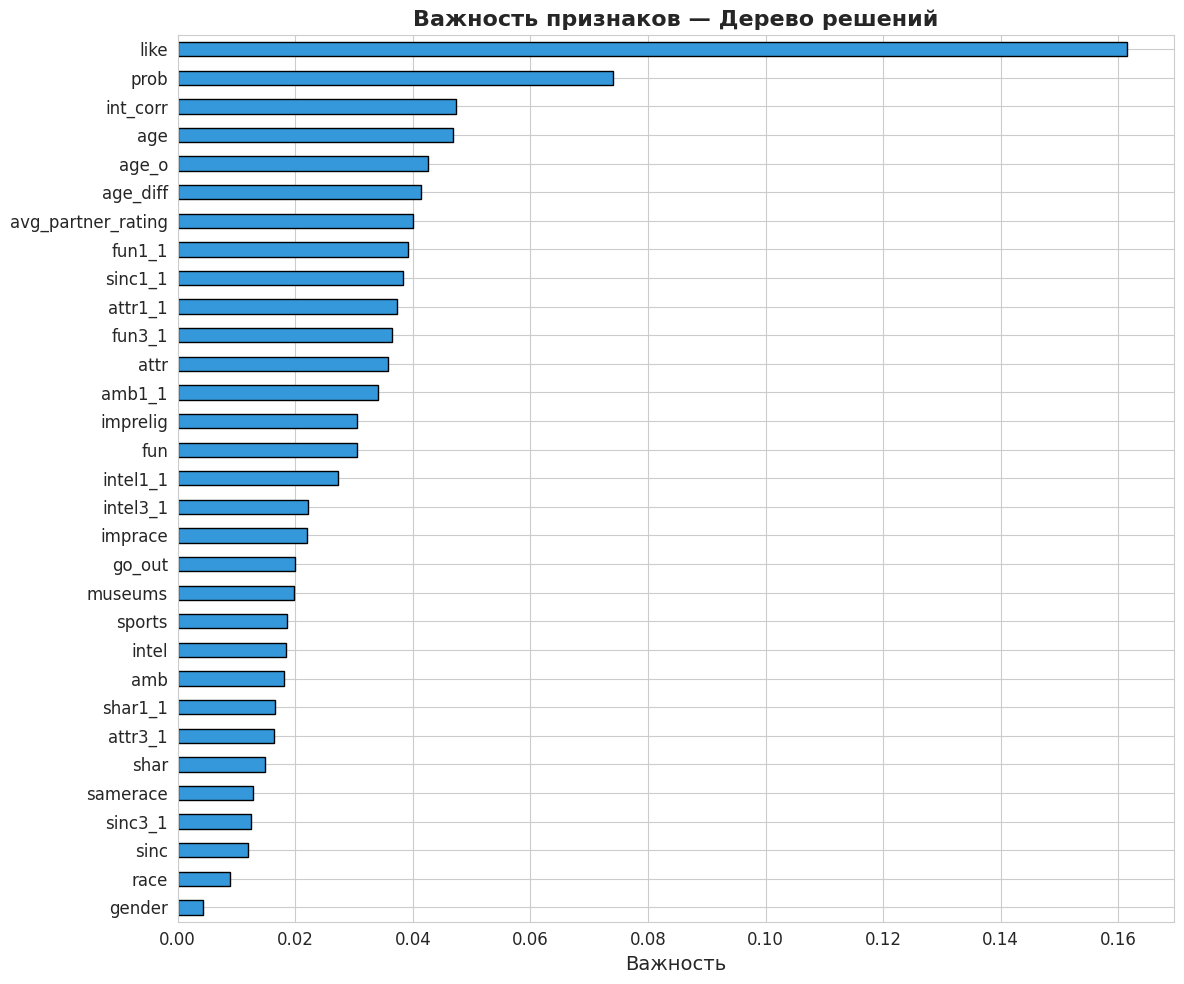


Топ-10 важнейших признаков (Дерево решений):
like                  0.1614
prob                  0.0740
int_corr              0.0473
age                   0.0468
age_o                 0.0425
age_diff              0.0415
avg_partner_rating    0.0400
fun1_1                0.0393
sinc1_1               0.0383
attr1_1               0.0373
dtype: float64


In [43]:
# Важность признаков для дерева решений
dt_importances = pd.Series(dt_model.feature_importances_, index=available_features)
dt_importances = dt_importances.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 10))
dt_importances.plot(kind='barh', color='#3498db', edgecolor='black', ax=ax)
ax.set_title('Важность признаков — Дерево решений', fontsize=16, fontweight='bold')
ax.set_xlabel('Важность', fontsize=14)
plt.tight_layout()
plt.show()

print("\nТоп-10 важнейших признаков (Дерево решений):")
print(dt_importances.sort_values(ascending=False).head(10).round(4))

In [70]:
print("\n" + "-" * 40)
print("СЛУЧАЙНЫЙ ЛЕС (Random Forest)")
print("-" * 40)

# rf_param_grid = {
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['sqrt', 'log2']
# }
rf_param_grid = {
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1),
    rf_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

print("Запуск GridSearchCV для Random Forest...")
rf_grid.fit(X_train, y_train)

print(f"\nЛучшие параметры: {rf_grid.best_params_}")
print(f"Лучший F1-score (CV): {rf_grid.best_score_:.4f}")

rf_model = rf_grid.best_estimator_
print(f"\nКоличество деревьев: {rf_model.n_estimators}")


----------------------------------------
СЛУЧАЙНЫЙ ЛЕС (Random Forest)
----------------------------------------
Запуск GridSearchCV для Random Forest...

Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучший F1-score (CV): 0.2545

Количество деревьев: 1000


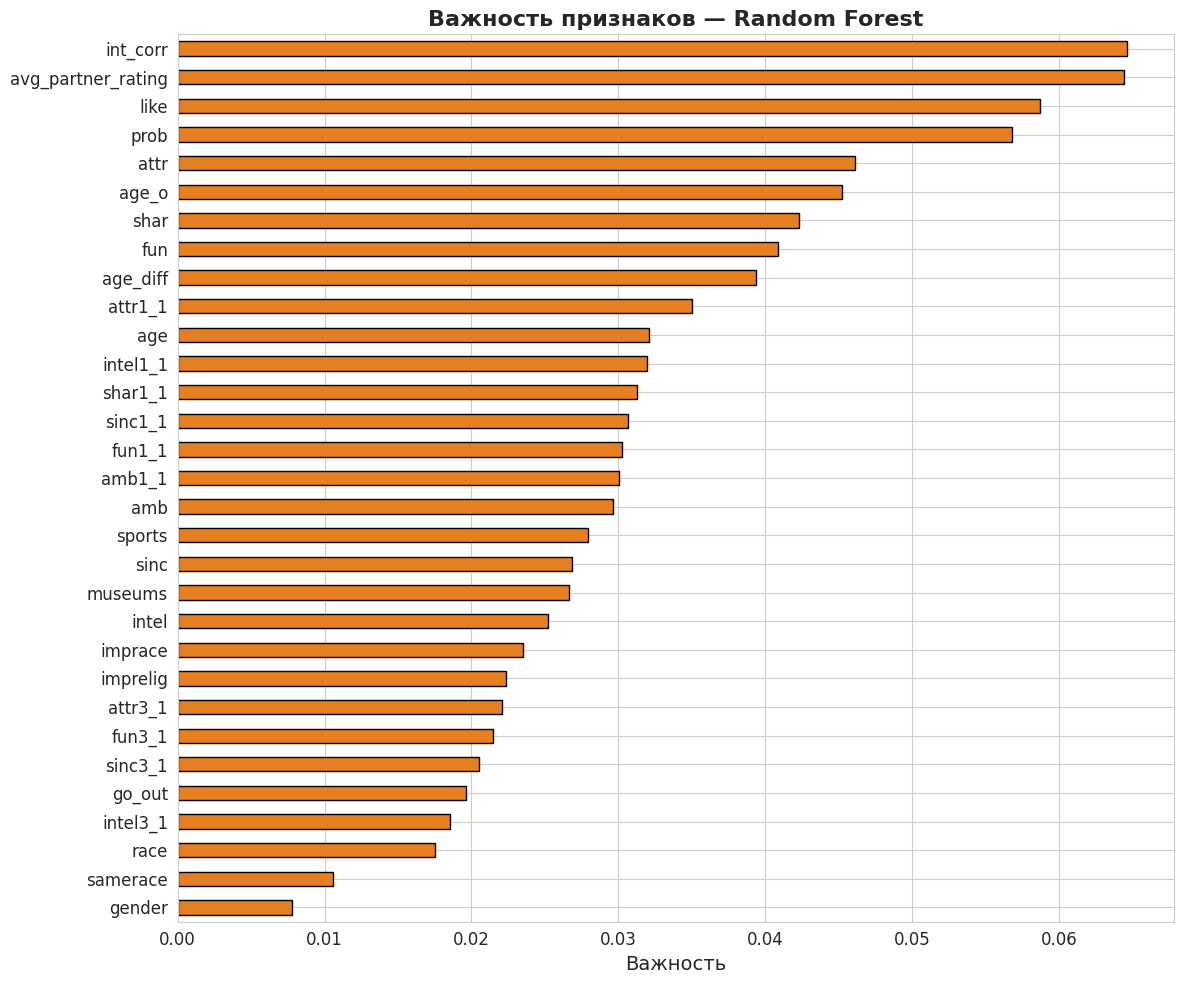


Топ-10 важнейших признаков (Random Forest):
int_corr              0.0646
avg_partner_rating    0.0644
like                  0.0587
prob                  0.0568
attr                  0.0461
age_o                 0.0452
shar                  0.0423
fun                   0.0409
age_diff              0.0394
attr1_1               0.0351
dtype: float64


In [71]:
# Важность признаков для Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=available_features)
rf_importances = rf_importances.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 10))
rf_importances.plot(kind='barh', color='#e67e22', edgecolor='black', ax=ax)
ax.set_title('Важность признаков — Random Forest', fontsize=16, fontweight='bold')
ax.set_xlabel('Важность', fontsize=14)
plt.tight_layout()
plt.show()

print("\nТоп-10 важнейших признаков (Random Forest):")
print(rf_importances.sort_values(ascending=False).head(10).round(4))

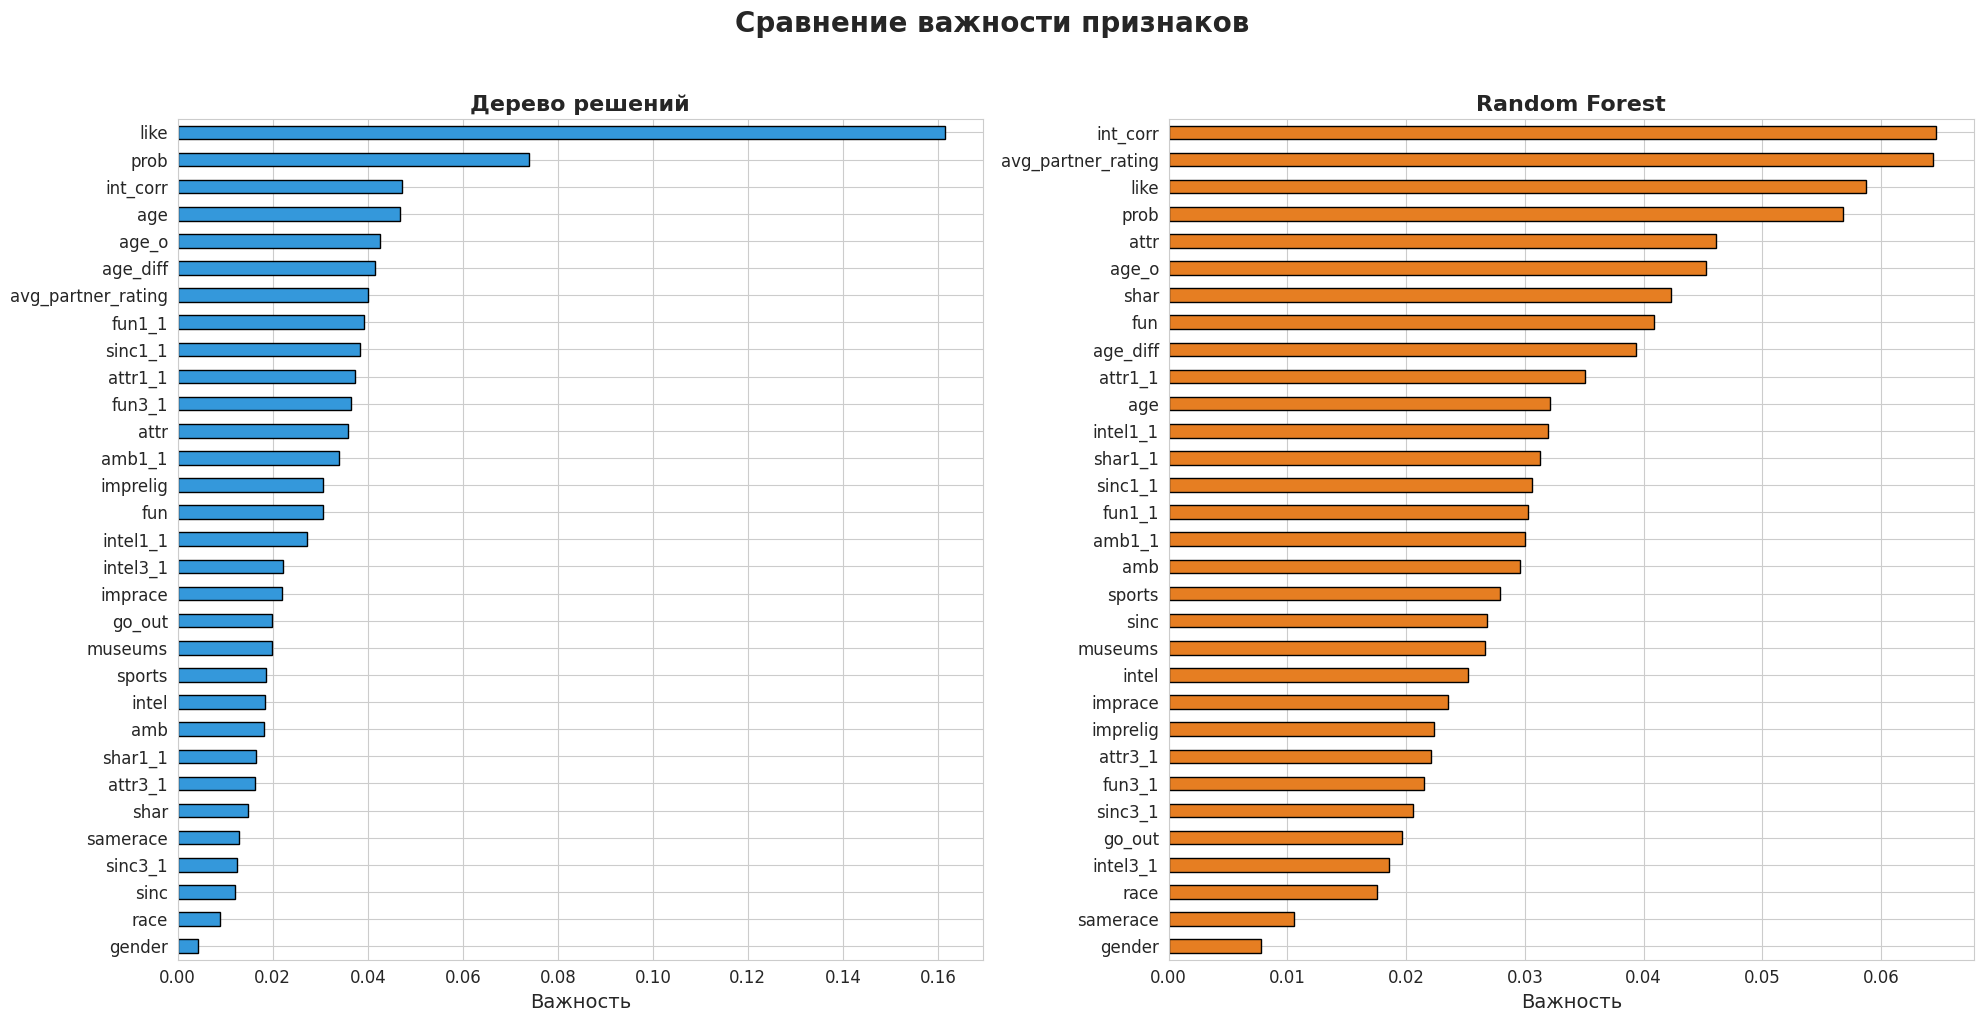

In [72]:
# Сравнение важности признаков двух моделей
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

dt_imp_sorted = dt_importances.sort_values(ascending=True)
dt_imp_sorted.plot(kind='barh', color='#3498db', edgecolor='black', ax=axes[0])
axes[0].set_title('Дерево решений', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Важность', fontsize=14)

rf_imp_sorted = rf_importances.sort_values(ascending=True)
rf_imp_sorted.plot(kind='barh', color='#e67e22', edgecolor='black', ax=axes[1])
axes[1].set_title('Random Forest', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Важность', fontsize=14)

fig.suptitle('Сравнение важности признаков', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Прогнозы моделей

In [80]:
print("=" * 70)
print("ПРОГНОЗЫ МОДЕЛЕЙ")
print("=" * 70)

# Прогнозы дерева решений
dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Прогнозы Random Forest
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

ПРОГНОЗЫ МОДЕЛЕЙ


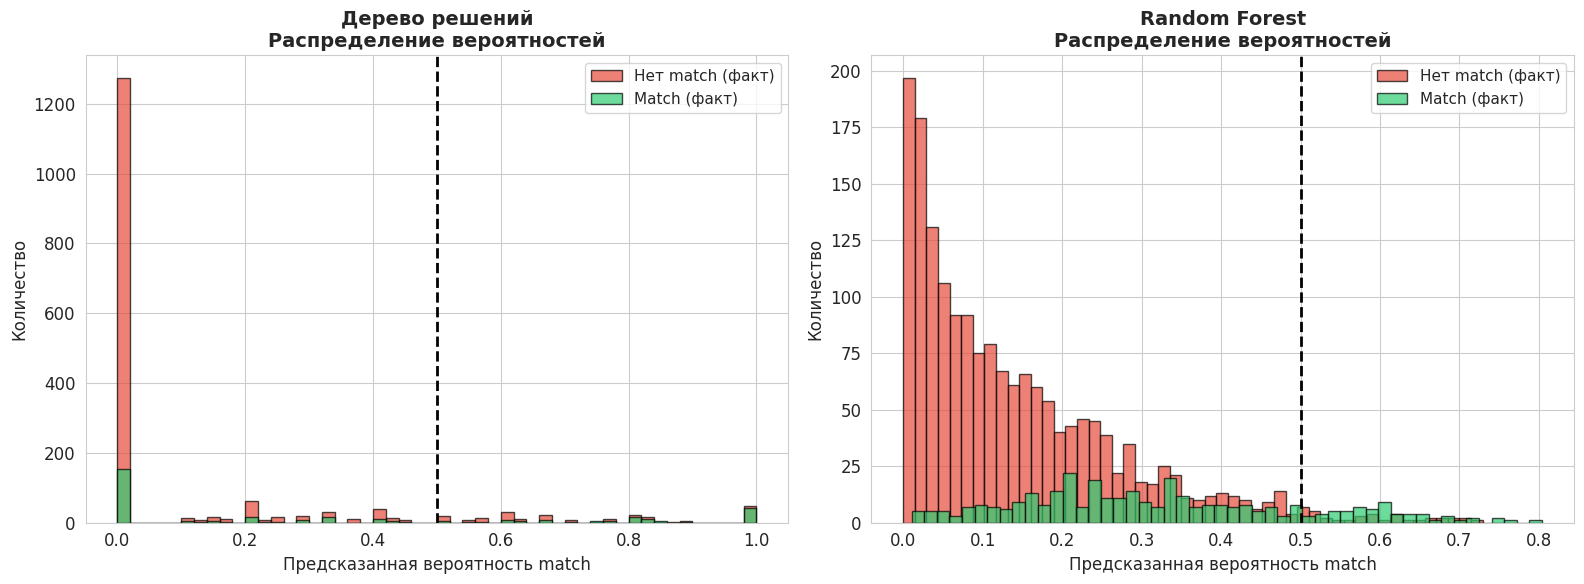

In [74]:
# Распределение предсказанных вероятностей
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Дерево решений
axes[0].hist(dt_pred_proba[y_test == 0], bins=50, alpha=0.7, color='#e74c3c',
             label='Нет match (факт)', edgecolor='black')
axes[0].hist(dt_pred_proba[y_test == 1], bins=50, alpha=0.7, color='#2ecc71',
             label='Match (факт)', edgecolor='black')
axes[0].set_title('Дерево решений\nРаспределение вероятностей', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Предсказанная вероятность match', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Порог 0.5')

# Random Forest
axes[1].hist(rf_pred_proba[y_test == 0], bins=50, alpha=0.7, color='#e74c3c',
             label='Нет match (факт)', edgecolor='black')
axes[1].hist(rf_pred_proba[y_test == 1], bins=50, alpha=0.7, color='#2ecc71',
             label='Match (факт)', edgecolor='black')
axes[1].set_title('Random Forest\nРаспределение вероятностей', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Предсказанная вероятность match', fontsize=12)
axes[1].set_ylabel('Количество', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Порог 0.5')

plt.tight_layout()
plt.show()

## Оценка качества моделей

In [75]:
# Вычисление метрик
def compute_metrics(y_true, y_pred, y_proba, model_name):
    """Вычисляет и возвращает основные метрики классификации."""
    metrics = {
        'Модель': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_proba)
    }
    return metrics

dt_metrics = compute_metrics(y_test, dt_pred, dt_pred_proba, 'Дерево решений')
rf_metrics = compute_metrics(y_test, rf_pred, rf_pred_proba, 'Random Forest')

# Сводная таблица метрик
metrics_df = pd.DataFrame([dt_metrics, rf_metrics])
metrics_df = metrics_df.set_index('Модель')

print("\nСВОДНАЯ ТАБЛИЦА МЕТРИК:")
print("=" * 70)
print(metrics_df.round(4).to_string())


СВОДНАЯ ТАБЛИЦА МЕТРИК:
                Accuracy  Precision  Recall  F1-score  AUC-ROC
Модель                                                        
Дерево решений    0.7919     0.3528  0.3159    0.3333   0.6584
Random Forest     0.8487     0.6429  0.1826    0.2844   0.8103


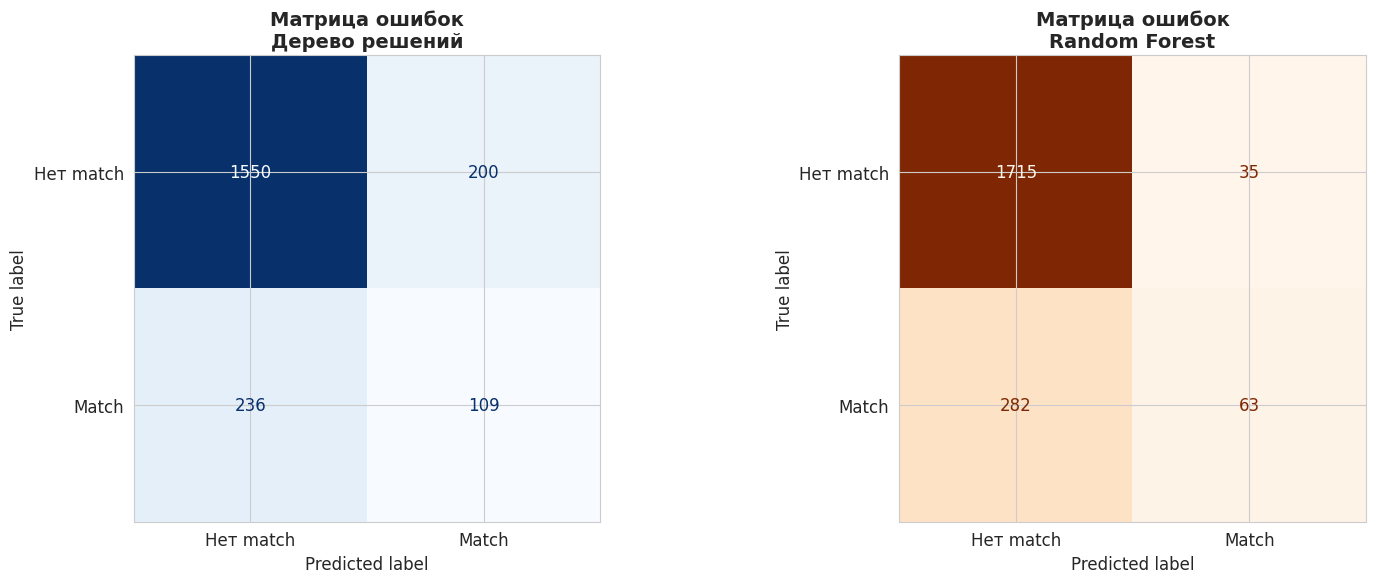

In [77]:
# Матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Дерево решений
cm_dt = confusion_matrix(y_test, dt_pred)
disp_dt = ConfusionMatrixDisplay(cm_dt, display_labels=['Нет match', 'Match'])
disp_dt.plot(cmap='Blues', ax=axes[0], colorbar=False)
axes[0].set_title('Матрица ошибок\nДерево решений', fontsize=14, fontweight='bold')

# Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['Нет match', 'Match'])
disp_rf.plot(cmap='Oranges', ax=axes[1], colorbar=False)
axes[1].set_title('Матрица ошибок\nRandom Forest', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

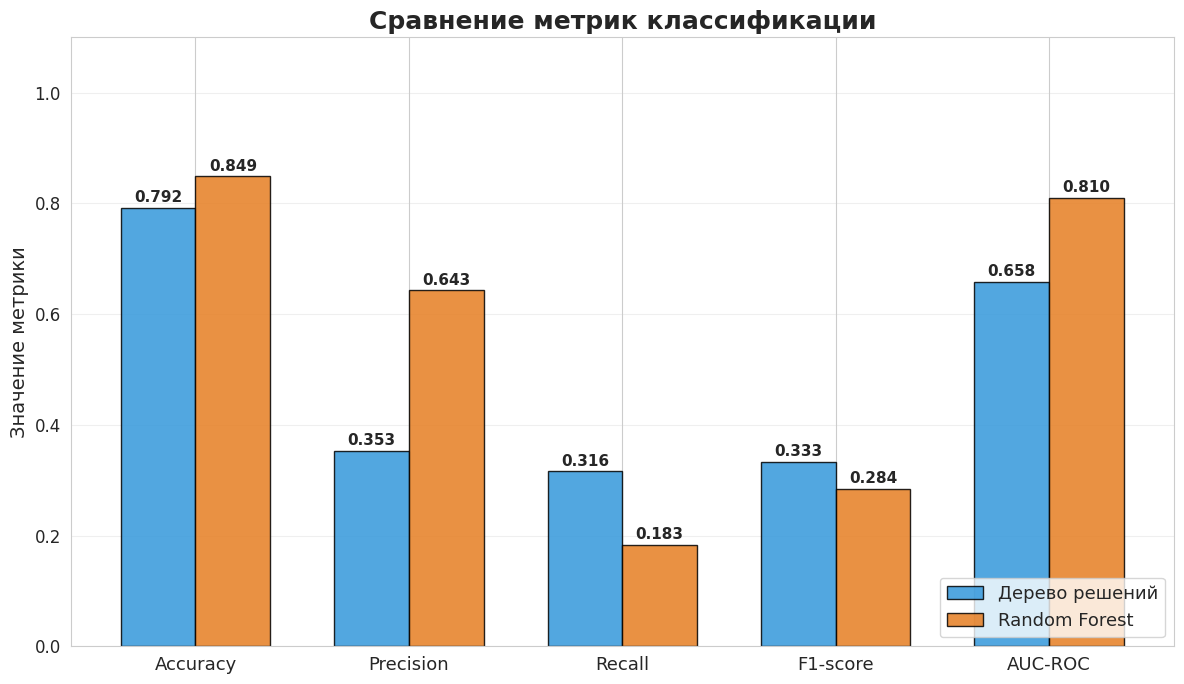

In [78]:
# Сравнительная столбчатая диаграмма метрик
fig, ax = plt.subplots(figsize=(12, 7))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
dt_values = [dt_metrics[m] for m in metrics_names]
rf_values = [rf_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax.bar(x - width/2, dt_values, width, label='Дерево решений',
               color='#3498db', edgecolor='black', alpha=0.85)
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest',
               color='#e67e22', edgecolor='black', alpha=0.85)

# Подписи значений на столбцах
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Значение метрики', fontsize=14)
ax.set_title('Сравнение метрик классификации', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, fontsize=13)
ax.legend(fontsize=13, loc='lower right')
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()